# Data Preparation

## Loading Data and Libraries

In [1]:
import unidecode
import os
import sys

sys.path.append('../src/')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

%matplotlib inline
%load_ext autoreload
%autoreload 2

DATAPATH = '../data/'

In [2]:
df_linf = pd.read_csv(os.path.join(DATAPATH, 'raw', 'preprocessed', 'linfomas_apac.csv'), low_memory=False, index_col=0)

In [3]:
df_linf.shape

(38472, 134)

In [4]:
df_linf.head(5)

,dt_process_quim,tp_gestao_quim,cod_tp_gestao_quim,cod_est_cnes_quim,num_apac_quim,dt_atend_paciente_quim,proc_princ_apac_quim,vl_tot_apac_aprov_quim,cod_uf_mun_quim,tp_est_quim,tip_prest_quim,est_man_ind_quim,cnpj_est_exe_quim,cnpj_mante_quim,cod_idade_quim,num_idade_quim,sexo_quim,raca_cor_quim,cod_uf_mun_paciente_quim,nac_paciente_quim,cep_paciente_quim,uf_res_dif_paciente_quim,mun_res_dif_paciente_quim,dt_ini_val_quim,dt_fim_val_quim,tp_atend_apac_quim,ind_apac_quim,mot_sai_perm_quim,ind_obito_quim,ind_encerr_quim,ind_perm_quim,ind_alta_quim,ind_transf_quim,dt_ocorr_quim,cod_org_emi_quim,car_atend_quim,num_apac_ant_quim,cod_soli_cnes_quim,dt_soli_quim,dt_auto_quim,cid_caus_assoc_quim,cid_princ_quim,cid_sec_quim,etnia_quim,aq_cid_10,aq_linfo_reg_inva,aq_estadi,aq_grahis,aq_dt_inden_pato,aq_trat_anter,aq_cidini1,aq_dt_ini_1_trat,aq_cidini2,aq_dt_ini_2_trat,aq_cidini3,aq_dt_ini_3_trat,aq_cont_trat,aq_dt_inic_trat_soli,aq_esqu_p1,aq_tot_mes_plan,aq_tot_mes_aut,aq_esu_p2,dt_process_rad,tp_gestao_rad,cod_tp_gestao_rad,cod_est_cnes_rad,num_apac_rad,dt_atend_paciente_rad,proc_princ_apac_rad,vl_tot_apac_aprov_rad,cod_uf_mun_rad,tp_est_rad,tip_prest_rad,est_man_ind_rad,cnpj_est_exe_rad,cnpj_mante_rad,cod_idade_rad,num_idade_rad,sexo_rad,raca_cor_rad,cod_uf_mun_paciente_rad,nac_paciente_rad,cep_paciente_rad,uf_res_dif_paciente_rad,mun_res_dif_paciente_rad,dt_ini_val_rad,dt_fim_val_rad,tp_atend_apac_rad,ind_apac_rad,mot_sai_perm_rad,ind_obito_rad,ind_encerr_rad,ind_perm_rad,ind_alta_rad,ind_transf_rad,dt_ocorr_rad,cod_org_emi_rad,car_atend_rad,num_apac_ant_rad,cod_soli_cnes_rad,dt_soli_rad,dt_auto_rad,cid_caus_assoc_rad,cid_princ_rad,cid_sec_rad,etnia_rad,ar_smrd,ar_cid_10,ar_linfo_reg_inva,ar_estadi,ar_grahis,ar_dt_inden_pato,ar_trat_anter,ar_cidini1,ar_dt_ini_1_trat,ar_cidini2,ar_dt_ini_2_trat,ar_cidini3,ar_dt_ini_3_trat,ar_cont_trat,ar_dt_inic_trat_soli,ar_finalid_trat,ar_cid_topo_1,ar_cid_topo_2,ar_cid_topo_3,ar_num_ins_1,ar_dt_ini_1,ar_dt_ini_2,ar_dt_ini_3,ar_dt_fim_1,ar_dt_fim_2,ar_dt_fim_3,ar_num_ins_2,ar_num_ins_3
num_csn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,2014-02,EP,120000.0,2001586.0,1.214200e+12,2014-02,304060011.0,1258.64,120040.0,5.0,40.0,I,6.360294e+13,NaN,4.0,24.0,F,3.0,120040.0,10.0,69901024.0,0.0,1.0,2014-02-07,2014-04-30,3.0,1.0,21.0,0.0,0.0,1.0,0.0,0.0,NaN,E120000001,1.0,0000000000000,2001586,2014-02-07,2014-02-07,0000,C81- Linfoma de Hodgkin,0000,NaN,NaN,3,3.0,99,2014-01-23,0,NaN,NaN,NaN,NaN,NaN,NaN,N,2014-02-07,ABVD,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-04,EP,120000.0,2001586.0,1.214200e+12,2014-04,304060011.0,1258.64,120040.0,5.0,40.0,I,6.360294e+13,NaN,4.0,48.0,M,3.0,120040.0,10.0,69900970.0,0.0,1.0,2014-04-10,2014-06-30,3.0,1.0,21.0,0.0,0.0,1.0,0.0,0.0,NaN,E120000001,1.0,0000000000000,2001586,2014-04-10,2014-04-10,0000,C81- Linfoma de Hodgkin,0000,NaN,NaN,3,2.0,99,2014-03-12,0,NaN,NaN,NaN,NaN,NaN,NaN,N,2014-04-10,ABVD,6.0,0.0,NaN,2015-04,EP,110000.0,2515377.0,1.115200e+12,2015-04,304010090.0,739.0,110020.0,36.0,22.0,I,1.068099e+12,NaN,4.0,49.0,M,2.0,120040.0,10.0,69900001.0,1.0,1.0,2015-04-14,2015-06-30,4.0,1.0,12.0,0.0,0.0,0.0,1.0,0.0,2015-04-24,E110000001,1.0,0.0,0.0,2015-04-14,2015-05-05,0000,C81- Linfoma de Hodgkin,C770,NaN,NaN,C819,S,2.0,X,2014-03-12,NaN,C819,2015-02-11,NaN,NaN,NaN,NaN,N,2015-04-14,1.0,C770,C770,NaN,2.0,20150414.0,20150414.0,NaN,2015-06-30,2015-06-30,NaN,2.0,NaN
10,2014-08,EP,120000.0,2001586.0,1.214200e+12,2014-07,304060011.0,1258.64,120040.0,5.0,40.0,I,6.360294e+13,NaN,4.0,35.0,F,3.0,120040.0,10.0,69900970.0,0.0,1.0,2014-07-25,2014-09-30,3.0,1.0,21.0,0.0,0.0,1.0,0.0,0.0,NaN,E120000001,1.0,0000000000000,2001586,2014-07-25,201

## Ajuste dos tipos

### Datas

In [5]:
dtcols = [c for c in df_linf.columns if 'dt_' in c]
dtcols

['dt_process_quim',
 'dt_atend_paciente_quim',
 'dt_ini_val_quim',
 'dt_fim_val_quim',
 'dt_ocorr_quim',
 'dt_soli_quim',
 'dt_auto_quim',
 'aq_dt_inden_pato',
 'aq_dt_ini_1_trat',
 'aq_dt_ini_2_trat',
 'aq_dt_ini_3_trat',
 'aq_dt_inic_trat_soli',
 'dt_process_rad',
 'dt_atend_paciente_rad',
 'dt_ini_val_rad',
 'dt_fim_val_rad',
 'dt_ocorr_rad',
 'dt_soli_rad',
 'dt_auto_rad',
 'ar_dt_inden_pato',
 'ar_dt_ini_1_trat',
 'ar_dt_ini_2_trat',
 'ar_dt_ini_3_trat',
 'ar_dt_inic_trat_soli',
 'ar_dt_ini_1',
 'ar_dt_ini_2',
 'ar_dt_ini_3',
 'ar_dt_fim_1',
 'ar_dt_fim_2',
 'ar_dt_fim_3']

In [6]:
df_linf[dtcols].head(3)

,dt_process_quim,dt_atend_paciente_quim,dt_ini_val_quim,dt_fim_val_quim,dt_ocorr_quim,dt_soli_quim,dt_auto_quim,aq_dt_inden_pato,aq_dt_ini_1_trat,aq_dt_ini_2_trat,aq_dt_ini_3_trat,aq_dt_inic_trat_soli,dt_process_rad,dt_atend_paciente_rad,dt_ini_val_rad,dt_fim_val_rad,dt_ocorr_rad,dt_soli_rad,dt_auto_rad,ar_dt_inden_pato,ar_dt_ini_1_trat,ar_dt_ini_2_trat,ar_dt_ini_3_trat,ar_dt_inic_trat_soli,ar_dt_ini_1,ar_dt_ini_2,ar_dt_ini_3,ar_dt_fim_1,ar_dt_fim_2,ar_dt_fim_3
num_csn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,2014-02,2014-02,2014-02-07,2014-04-30,NaN,2014-02-07,2014-02-07,2014-01-23,NaN,NaN,NaN,2014-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-04,2014-04,2014-04-10,2014-06-30,NaN,2014-04-10,2014-04-10,2014-03-12,NaN,NaN,NaN,2014-04-10,2015-04,2015-04,2015-04-14,2015-06-30,2015-04-24,2015-04-14,2015-05-05,2014-03-12,2015-02-11,NaN,NaN,2015-04-14,20150414.0,20150414.0,NaN,2015-06-30,2015-06-30,NaN
10,2014-08,2014-07,2014-07-25,2014-09-30,NaN,2014-07-25,2014-07-25,2014-06-30,NaN,NaN,NaN,2014-07-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
cols_to_date_month = ['dt_process_quim', 'dt_process_rad', 'dt_atend_paciente_quim', 'dt_atend_paciente_rad']
cols_to_date_day = list(set(dtcols) - set(cols_to_date_month))

In [8]:
df_linf[cols_to_date_day] = df_linf[cols_to_date_day].apply(lambda x: pd.to_datetime(x))
df_linf[cols_to_date_month] = df_linf[cols_to_date_month].apply(lambda x: pd.to_datetime(x).dt.to_period('M'))

### Objects (strings)

In [9]:
cat_cols = df_linf.select_dtypes('object').columns
df_linf[cat_cols] = df_linf[cat_cols].apply(lambda x: x.astype(str))

## Seleção dos dados considerando a precedência entre Quimioterapia e Radio
O dataset inicial apresenta colunas com o mesmo sentido, porém com informações da base de Quimioterapia e outra de Radioterapia. Muitas informações são duplicadas, pois representam atributos do mesmo paciente.
A seleção é feita para reduzir o tamanho e garantir corretude de aspectos temporais, dado que os tratamentos podem ter acontecidos em épocas diferentes. O objetivo é analisar os motivos do tratamento tardio, deixando para trabalhos futuros a análise do decorrer do tratamento, por este motivo, não há uma preocupação em manter ambas informações e nem granularidade de procedimentos. 

In [10]:
def identify_first(row):
    dt_first_ocurrence = None
    type_first_ocurrence = None
    dt_first_proccess = None
    type_first_proccess = None
    
    type_ = None
    
    # Se algum dos tratamentos for nulo, automaticamente adiciona o tratamento que tem valor
    # obs: sempre vai existir um com valor.
    if pd.isnull(row['dt_process_quim']):
        type_ = 'rad'
        dt_first_ocurrence = row['dt_process_rad']
        type_first_ocurrence = 'Radio'
        dt_first_proccess = row['dt_process_rad']
        type_first_proccess = 'Radio' 
    
    if pd.isnull(row['dt_process_rad']):
        type_ = 'quim'
        dt_first_ocurrence = row['aq_dt_inden_pato']
        type_first_ocurrence = 'Quimio'
        dt_first_proccess = row['dt_process_quim']
        type_first_proccess = 'Quimio'

    # Se apenas um for válido, já pode retornar
    if type_:
        return {'type_first_proccess': type_first_proccess, 'dt_process':dt_first_proccess, 'type_first_ocurrence': type_first_ocurrence, 'dt_inden_pato': dt_first_ocurrence}

    # caso exista ambos tratamentos, comparar datas para selecionar o primeiro tratamento
    else:    
        if row['aq_dt_inden_pato'] <= row['ar_dt_inden_pato']:
            dt_first_ocurrence = row['aq_dt_inden_pato']
            type_first_ocurrence = 'Quimio'
        else:
            dt_first_ocurrence = row['dt_process_rad']
            type_first_ocurrence = 'Radio'

        if row['dt_process_quim'] <= row['dt_process_rad']:
            dt_first_proccess = row['dt_process_quim']
            type_first_proccess = 'Quimio'
        else:
            dt_first_proccess = row['dt_process_rad']
            type_first_proccess = 'Radio' 

    return {'type_first_proccess': type_first_proccess, 'dt_process':dt_first_proccess, 'type_first_ocurrence': type_first_ocurrence, 'dt_inden_pato': dt_first_ocurrence}

In [11]:
df_linf_prev = df_linf.apply(identify_first, axis=1, result_type='expand')
df_linf = pd.concat([df_linf, df_linf_prev], axis=1)

In [12]:
df_linf.columns

Index(['dt_process_quim', 'tp_gestao_quim', 'cod_tp_gestao_quim',
       'cod_est_cnes_quim', 'num_apac_quim', 'dt_atend_paciente_quim',
       'proc_princ_apac_quim', 'vl_tot_apac_aprov_quim', 'cod_uf_mun_quim',
       'tp_est_quim',
       ...
       'ar_dt_ini_3', 'ar_dt_fim_1', 'ar_dt_fim_2', 'ar_dt_fim_3',
       'ar_num_ins_2', 'ar_num_ins_3', 'dt_inden_pato', 'dt_process',
       'type_first_ocurrence', 'type_first_proccess'],
      dtype='object', length=138)

#### Filtrar colunas em comum 
Selecionar colunas em comum nos tratamentos para construir um dataset unificado, com dimensionalidade reduzida e com foco no início do tratamento (independente de qual foi)

In [13]:
import re

regex_quim = re.compile(r'(^aq_|_quim$)')
regex_rad = re.compile(r'(^ar_|_rad$)')

quim_cols = list(filter(regex_quim.search, df_linf.columns))
rad_cols = list(filter(regex_rad.search, df_linf.columns))

quim_cols_transformed = [re.sub(r'(^aq_|_quim$)' , '', col) for col in quim_cols]
rad_cols_transformed = [re.sub(r'(^ar_|_rad$)' , '', col) for col in rad_cols]

In [14]:
# Mapeamento das colunas ajustadas para o valor original
dict_quim_cols = dict(zip(quim_cols_transformed, quim_cols))
dict_rad_cols = dict(zip(rad_cols_transformed, rad_cols))

In [15]:
# Atributos em comum em Quimio e Radio
common_cols = list(set(dict_quim_cols.keys()).intersection(dict_rad_cols.keys()))

In [16]:
# Selecao das colunas em comuns, obtendo o nome original 
cols_to_use_quim = [dict_quim_cols[col] for col in common_cols]
cols_to_use_rad = [dict_rad_cols[col] for col in common_cols]

### Seleção e ajuste das colunas

In [17]:
df_linf_radio = df_linf[df_linf['type_first_proccess'] == 'Radio'][cols_to_use_rad]
df_linf_quim = df_linf[df_linf['type_first_proccess'] == 'Quimio'][cols_to_use_quim]

In [18]:
print('Quimio:', df_linf_quim.shape)
print('Radio:', df_linf_radio.shape)

Quimio: (36246, 58)
Radio: (2226, 58)


In [19]:
# Altera o nome das colunas para o nome padrão para ambas
df_linf_quim.columns = common_cols
df_linf_radio.columns = common_cols

In [20]:
# Junta as bases (quimio e radio) e ordena pela data do processo
df_linf = pd.concat([df_linf_quim, df_linf_radio])
df_linf = df_linf.sort_values('dt_process')

In [21]:
df_linf.head(3)

,sexo,cod_uf_mun_paciente,mun_res_dif_paciente,dt_ocorr,tip_prest,cid_princ,dt_ini_3_trat,cid_caus_assoc,ind_alta,mot_sai_perm,ind_encerr,dt_inic_trat_soli,tp_atend_apac,nac_paciente,dt_ini_2_trat,vl_tot_apac_aprov,car_atend,cnpj_est_exe,num_apac,proc_princ_apac,cod_soli_cnes,cid_10,cod_tp_gestao,num_idade,dt_inden_pato,cont_trat,etnia,trat_anter,tp_gestao,linfo_reg_inva,estadi,est_man_ind,ind_obito,cidini3,ind_transf,dt_fim_val,dt_ini_1_trat,dt_atend_paciente,cep_paciente,cod_uf_mun,uf_res_dif_paciente,num_apac_ant,cnpj_mante,ind_apac,ind_perm,cidini2,dt_process,grahis,cod_org_emi,cid_sec,tp_est,dt_ini_val,dt_auto,cod_est_cnes,cod_idade,raca_cor,cidini1,dt_soli
num_csn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24965,F,411850.0,1.0,NaT,61.0,C82-C85;C96- Linfoma não Hodgkin,NaT,0000,0.0,21.0,0.0,2014-01-28,3.0,10.0,NaT,640.0,1.0,8.127055e+13,4.114209e+12,304030163.0,2740338,C859,410000.0,71.0,2014-01-20,S,nan,S,EP,3,4.0,I,0.0,nan,0.0,2014-03-31,NaT,2014-01,85509200.0,410480.0,0.0,nan,NaN,1.0,1.0,nan,2014-01,8,E410000010,0000,7.0,2014-01-31,2014-02-04,2740338.0,4.0,3.0,nan,2014-01-31
30494,M,431020.0,1.0,NaT,61.0,C82-C85;C96- Linfoma não Hodgkin,NaT,0000,0.0,21.0,0.0,2014-01-14,3.0,10.0,NaT,640.0,1.0,9.073051e+13,4.314202e+12,304030163.0,2261057,nan,430000.0,70.0,2014-01-02,N,nan,N,EP,3,4.0,I,0.0,nan,0.0,2014-03-31,NaT,2014-01,98700000.0,431020.0,0.0,0000000000000,NaN,1.0,1.0,nan,2014-01,0,M431020001,0000,5.0,2014-01-20,2014-01-20,2261057.0,4.0,3.0,nan,2014-01-20
30471,F,430470.0,1.0,NaT,61.0,C82-C85;C96- Linfoma não Hodgkin,NaT,0000,0.0,21.0,0.0,2014-01-23,3.0,10.0,NaT,1447.7,1.0,8.845023e+13,4.314200e+12,304060127.0,2262274,C833,430470.0,81.0,2014-01-16,S,nan,N,MN,3,4.0,I,0.0,nan,0.0,2014-03-31,NaT,2014-01,99500000.0,430470.0,0.0,0000000000000,NaN,1.0,1.0,nan,2014-01,ep,M430470001,0000,5.0,2014-01-23,2014-01-23,2262274.0,4.0,1.0,nan,2014-01-23


## Definir diagnósticos tardios

#### Remoção de instância sem *estadi*

Como o estádio é o principal fator em análise, quando ele não está presente nos dados do paciente, a instância é removida. Esta remoção não causa grande impacto, por o número ser pequeno. Mais na frente pode ser investigado algumas formas para evitar a exclusão da instância, mas no momento não é primoridal.

In [22]:
df_linf.dropna(subset=['estadi'], inplace=True)

#### Criação do atributo *tardio*, que indica se o diagnóstico do câncer foi tardio ou não 

In [23]:
df_linf['tardio'] = df_linf['estadi'].apply(lambda x: 1 if x > 2 else 0)

### Integrar com investimentos em saúde do município

In [24]:
df_recursos_mun = pd.read_csv(os.path.join(DATAPATH, 'raw', 'preprocessed', 'recursos_fis_hum_equi.csv'))
print(df_recursos_mun.shape)
df_recursos_mun.head()

(380596, 13)


,rf_tomografos_computadorizados,rf_mamografos,rfressonancia_magnetica,equipes_de_saude_equipes_saude_da_familia,rh_medicos,equipes_de_saude_nucleos_de_apoio_a_saude_da_familia_nasf,rf_leitos_de_internacao,rh_enfermeiros,rf_raios_x,municipio,data,cod_municipio,nom_municipio
0,0.0,0.0,0.0,5.0,9.0,1.0,45.0,14.0,1.0,110001 Alta Floresta D'Oeste,2014-01-01,110001,Alta Floresta D'Oeste
1,0.0,0.0,0.0,0.0,7.0,1.0,16.0,6.0,0.0,110037 Alto Alegre dos Parecis,2014-01-01,110037,Alto Alegre dos Parecis
2,0.0,0.0,0.0,2.0,4.0,0.0,15.0,7.0,1.0,110040 Alto Paraíso,2014-01-01,110040,Alto Paraíso
3,0.0,0.0,0.0,3.0,3.0,0.0,35.0,10.0,1.0,110034 Alvorada D'Oeste,2014-01-01,110034,Alvorada D'Oeste
4,1.0,1.0,1.0,9.0,111.0,1.0,85.0,54.0,4.0,110002 Ariquemes,2014-01-01,110002,Ariquemes


In [25]:
df_recursos_mun['data'] = pd.to_datetime(df_recursos_mun['data']).dt.to_period('M')

In [26]:
df_recursos_mun.fillna(0, inplace=True)

In [27]:
df_linf['cod_uf_mun_paciente'] = df_linf['cod_uf_mun_paciente'].astype(int)

A base de dados de Linfomas contém alguns códigos de municípios que não foram encontrados na base de recursos. Analisando os códigos, foi notado que todos iniciavam (informação do UF) com 53. Todos são referentes a Brasília. Os CEPs também foram utilizados para validar isso. Dado essa informação, os códigos que iniciavam com 53 foram substituídos por 530010, código de Brasília.

In [28]:
idx_mun_brasilia = df_linf[df_linf['cod_uf_mun_paciente'].astype(str).apply(lambda x: x[:2]) == '53'].index
df_linf.loc[idx_mun_brasilia, 'cod_uf_mun_paciente'] = 530010

Juntar os dados de acordo com o município e a data do processo igual a data de quando os recursos foram calculados.

In [29]:
df_linf = pd.merge(df_linf, 
         df_recursos_mun, 
         left_on=['cod_uf_mun_paciente', 'dt_process'], 
         right_on=['cod_municipio', 'data'], how='left')

### Integrar com informações demográficas do município

#### Carregar base de dados com informações dos municípios

In [30]:
df_brazil_cities = pd.read_csv(os.path.join(DATAPATH, 'external', 'BRAZIL_CITIES.csv'), sep=';')
print(df_brazil_cities.shape)
df_brazil_cities.head()

(5576, 81)


,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,São Paulo,SP,1,11253503.0,11133776.0,119727.0,3576148.0,3548433.0,27715.0,10463636.0,129464.0,514794.0,684443.0,783702.0,7058221.0,1293012.0,94.0,1134.0,28.0,"0,805","0,843","0,855","0,725","-46,57038318","-23,5673865","783,62",2047668.0,5543127.0,"1521,11",Capital,A,12176866.0,Urbano,"43867,07","63306754,97","464656988,11","41902892,72","569910502,87","117125386,74","687035889,61",12038175.0,"57071,43",Demais serviços,4.577250e+10,530446.0,739.0,79.0,31566.0,332.0,657.0,25222.0,150633.0,19515.0,29290.0,38720.0,23738.0,14003.0,49181.0,76757.0,153.0,16030.0,22248.0,6687.0,24832.0,0.0,64.0,57.0,10022.0,1693.0,626.0,83.0,8.0,1.947077e+13,2.893261e+12,5740995.0,1134570.0,3236.0,1.0,130.0,7.0,225.0
1,Osasco,SP,0,666740.0,664447.0,2293.0,202009.0,202009.0,NaN,616068.0,8089.0,32305.0,42733.0,49379.0,420590.0,62972.0,0.0,0.0,174.0,"0,78","0,776","0,84","0,718","-46,78881014","-23,533612","742,97",98664.0,231302.0,"64954,00",Negócios E Cultura,B,696850.0,Urbano,"947,16","3036,39","53111430,66","2627577,24","58776349,73","15626341,33","74402691,05",696382.0,"106841,78",Demais serviços,1.758451e+09,15315.0,11.0,2.0,863.0,1.0,29.0,703.0,6002.0,1026.0,1230.0,706.0,271.0,238.0,761.0,1535.0,6.0,527.0,492.0,142.0,770.0,0.0,0.0,2.0,272.0,67.0,26.0,10.0,2.0,6.732330e+12,1.321699e+10,283641.0,73477.0,174.0,NaN,7.0,1.0,10.0
2,Rio De Janeiro,RJ,1,6320446.0,6264915.0,55531.0,2147235.0,2147235.0,NaN,5426838.0,58958.0,235380.0,321084.0,382267.0,3559037.0,870112.0,2098.0,41072.0,46.0,"0,799","0,84","0,845","0,719","-43,22787512","-22,87665212","11,80",1271672.0,2417123.0,"1200255,00",Metropolitana,A,6688927.0,Urbano,"81,37","36334430,50","177361095,84","47548,35","261325243,88","68106,12","329431359,90",6498837.0,"50690,82",Demais serviços,2.364284e+10,190038.0,172.0,274.0,6824.0,235.0,272.0,7797.0,47545.0,4825.0,12289.0,9070.0,6327.0,4281.0,19248.0,34812.0,120.0,6744.0,9905.0,5039.0,14224.0,0.0,35.0,94.0,13247.0,815.0,304.0,34.0,5.0,2.283445e+12,9.738864e+11,2039930.0,363486.0,289.0,1.0,68.0,1.0,120.0
3,Brasília,DF,1,2570160.0,2564370.0,5790.0,774820.0,751558.0,23261.0,2450634.0,35833.0,143641.0,190078.0,207283.0,1683918.0,189881.0,162894.0,822413.0,9.0,"0,82","0,863","0,873","0,742","-47,88790548","-15,79408736","1115,25",460682.0,920410.0,"5760783,00",Brasília - Patrimônio Cultural Da Humanidade,A,2974703.0,Urbano,"820754,66","9659849,10","103819469,69","92051,45","206351521,16","29145585,42","235497106,59",2977216.0,"79099,77","Administração, defesa, educação e saúde públic...",NaN,86200.0,242.0,42.0,3269.0,22.0,130.0,4685.0,29018.0,2157.0,6788.0,3254.0,1527.0,1670.0,6717.0,10346.0,204.0,3043.0,5363.0,1197.0,6403.0,0.0,123.0,23.0,4960.0,150.0,274.0,14.0,4.0,2.920933e+11,8.016164e+12,1288107.0,211392.0,594.0,1.0,28.0,1.0,60.0
4,Porto Alegre,RS,1,1409351.0,1403450.0,5901.0,508503.0,508503.0,NaN,1339712.0,15235.0,58369.0,79310.0,93989.0,889503.0,203306.0,766.0,7967.0,32.0,"0,805","0,867","0,857","0,702","-51,22866046","-30,03003677","42,24",352371.0,663846.0,"495,39",Porto Alegre,A,1479101.0,Urbano,"28354,58","6768083,47","48930408,04","6712383,63","62439229,72","10986034,54","73425,26",1481019.0,"49577,53",Demais serviços,5.358322e+09,80082.0,196.0,31.0,3482.0,57.0,95.0,4039.0,21550.0,2523.0,420

In [31]:
df_brazil_cities.drop_duplicates(['CITY', 'STATE'], inplace=True)

#### Carregar base de dados com códigos dos municípios
Esta base de dados foi utilizada para gerar a base anterior, que é uma agregação de diversas fontes. Apesar de ter diversas informações, a base anterior não contém o código do município. Para obter o código, que será útil para integrar com a base dos pacientes com linfomas, será utilizada a base do PIB, que apresenta o mesmo formato nos nomes dos municípios e informações semelhantes. A junção será feita através nos nomes.

In [32]:
df_pib_mun = pd.read_csv(os.path.join(DATAPATH, 'external', 'pib.csv'))
print(df_pib_mun.shape)
df_pib_mun.head()

(5571, 4)


,Variável,Cód.,Brasil e Município,PIB
0,Produto Interno Bruto a preços correntes (Mil ...,1,Brasil,6267205000
1,Produto Interno Bruto a preços correntes (Mil ...,1100015,Alta Floresta D'Oeste (RO),477783
2,Produto Interno Bruto a preços correntes (Mil ...,1100023,Ariquemes (RO),2183383
3,Produto Interno Bruto a preços correntes (Mil ...,1100031,Cabixi (RO),133345
4,Produto Interno Bruto a preços correntes (Mil ...,1100049,Cacoal (RO),1944787


In [33]:
# Remover a primeira instância, que contém informação do Brasil, depois disso a base ficará apenas com municípios
df_pib_mun.drop(0, inplace=True)

In [34]:
df_pib_mun.columns = ['VARIAVEL', 'COD_MUNICIPIO', 'MUNICIPIO', 'PIB']

In [35]:
# Criar atributo UF a partir do campo MUNICIPIO. A informação está presente após o nome e entre parênteses
df_pib_mun['UF'] = df_pib_mun['MUNICIPIO'].apply(lambda x: re.search(' \((\w*)\)$', x).group(1))
df_pib_mun['MUNICIPIO'] = df_pib_mun['MUNICIPIO'].apply(lambda x: re.sub(' \([A-Z]*\)$', '', x))

In [36]:
df_pib_mun['MUNICIPIO'] = df_pib_mun['MUNICIPIO'].str.upper()
df_brazil_cities['CITY'] = df_brazil_cities['CITY'].str.upper()

In [37]:
df_pib_mun.head()

,VARIAVEL,COD_MUNICIPIO,MUNICIPIO,PIB,UF
1,Produto Interno Bruto a preços correntes (Mil ...,1100015,ALTA FLORESTA D'OESTE,477783,RO
2,Produto Interno Bruto a preços correntes (Mil ...,1100023,ARIQUEMES,2183383,RO
3,Produto Interno Bruto a preços correntes (Mil ...,1100031,CABIXI,133345,RO
4,Produto Interno Bruto a preços correntes (Mil ...,1100049,CACOAL,1944787,RO
5,Produto Interno Bruto a preços correntes (Mil ...,1100056,CEREJEIRAS,408048,RO


In [38]:
cols_to_use_br_cities = ['CITY', 'STATE', 'CAPITAL', 'IDHM', 'IDHM_Longevidade', 'IDHM_Educacao', 'LONG', 'LAT', 'AREA',
                  'ESTIMATED_POP', 'RURAL_URBAN', 'GVA_SERVICES', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'COMP_Q',]

In [39]:
df_brazil_cities = pd.merge(df_pib_mun[['COD_MUNICIPIO', 'MUNICIPIO', 'UF']], df_brazil_cities[cols_to_use_br_cities], left_on=['MUNICIPIO', 'UF'], right_on=['CITY', 'STATE'], how='left')

In [40]:
df_brazil_cities.head()

,COD_MUNICIPIO,MUNICIPIO,UF,CITY,STATE,CAPITAL,IDHM,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,AREA,ESTIMATED_POP,RURAL_URBAN,GVA_SERVICES,GDP,POP_GDP,GDP_CAPITA,COMP_Q
0,1100015,ALTA FLORESTA D'OESTE,RO,ALTA FLORESTA D'OESTE,RO,0,"0,64","0,763","0,526","-61,9998239","-11,9355403","7067025,00",23167.0,Intermediário Adjacente,"114455,32","477782,74",25506.0,"18732,17",13.0
1,1100023,ARIQUEMES,RO,ARIQUEMES,RO,0,"0,70","0,806","0,6","-63,03326928","-9,908462867","4426571,00",106168.0,Urbano,"879,97","2183383,20",105896.0,"20618,18",74.0
2,1100031,CABIXI,RO,CABIXI,RO,0,"0,65","0,757","0,559","-60,54431358","-13,49976346","1314352,00",5438.0,Rural Adjacente,"24091,22","133345,39",6289.0,"21202,96",1.0
3,1100049,CACOAL,RO,CACOAL,RO,0,"0,718","0,821","0,62","-61,44294421","-11,43386503","3792892,00",84813.0,Urbano,"846490,22","1944786,64",87877.0,"22130,78",104.0
4,1100056,CEREJEIRAS,RO,CEREJEIRAS,RO,0,"0,69","0,799","0,602","-60,81842616","-13,19503303","2783,30",16444.0,Urbano,"175059,55","408047,84",17959.0,"22721,08",12.0


In [41]:
# A base BRAZIL_CITIES contém um caracter a mais comparado a base de linfomas, por isto será removido para ficar no mesmo padrão 
df_brazil_cities['COD_MUNICIPIO'] = df_brazil_cities['COD_MUNICIPIO'].astype(int).astype(str).apply(lambda x: x[:-1])
df_brazil_cities['COD_MUNICIPIO'] = df_brazil_cities['COD_MUNICIPIO'].astype(int)

In [42]:
df_linf = pd.merge(df_linf, df_brazil_cities, left_on='cod_uf_mun_paciente', right_on='COD_MUNICIPIO', how='left')

In [43]:
df_linf.head(2)

,sexo,cod_uf_mun_paciente,mun_res_dif_paciente,dt_ocorr,tip_prest,cid_princ,dt_ini_3_trat,cid_caus_assoc,ind_alta,mot_sai_perm,ind_encerr,dt_inic_trat_soli,tp_atend_apac,nac_paciente,dt_ini_2_trat,vl_tot_apac_aprov,car_atend,cnpj_est_exe,num_apac,proc_princ_apac,cod_soli_cnes,cid_10,cod_tp_gestao,num_idade,dt_inden_pato,cont_trat,etnia,trat_anter,tp_gestao,linfo_reg_inva,estadi,est_man_ind,ind_obito,cidini3,ind_transf,dt_fim_val,dt_ini_1_trat,dt_atend_paciente,cep_paciente,cod_uf_mun,uf_res_dif_paciente,num_apac_ant,cnpj_mante,ind_apac,ind_perm,cidini2,dt_process,grahis,cod_org_emi,cid_sec,tp_est,dt_ini_val,dt_auto,cod_est_cnes,cod_idade,raca_cor,cidini1,dt_soli,tardio,rf_tomografos_computadorizados,rf_mamografos,rfressonancia_magnetica,equipes_de_saude_equipes_saude_da_familia,rh_medicos,equipes_de_saude_nucleos_de_apoio_a_saude_da_familia_nasf,rf_leitos_de_internacao,rh_enfermeiros,rf_raios_x,municipio,data,cod_municipio,nom_municipio,COD_MUNICIPIO,MUNICIPIO,UF,CITY,STATE,CAPITAL,IDHM,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,AREA,ESTIMATED_POP,RURAL_URBAN,GVA_SERVICES,GDP,POP_GDP,GDP_CAPITA,COMP_Q
0,F,411850,1.0,NaT,61.0,C82-C85;C96- Linfoma não Hodgkin,NaT,0000,0.0,21.0,0.0,2014-01-28,3.0,10.0,NaT,640.0,1.0,8.127055e+13,4.114209e+12,304030163.0,2740338,C859,410000.0,71.0,2014-01-20,S,nan,S,EP,3,4.0,I,0.0,nan,0.0,2014-03-31,NaT,2014-01,85509200.0,410480.0,0.0,nan,NaN,1.0,1.0,nan,2014-01,8,E410000010,0000,7.0,2014-01-31,2014-02-04,2740338.0,4.0,3.0,nan,2014-01-31,1,4.0,4.0,2.0,4.0,179.0,1.0,188.0,93.0,27.0,411850 Pato Branco,2014-01,411850,Pato Branco,411850,PATO BRANCO,PR,PATO BRANCO,PR,0,"0,782","0,845","0,728","-52,677362","-26,22995852","539087,00",81893.0,Urbano,"1651459,19","3331621,74",79869.0,"41713,58",222.0
1,M,431020,1.0,NaT,61.0,C82-C85;C96- Linfoma não Hodgkin,NaT,0000,0.0,21.0,0.0,2014-01-14,3.0,10.0,NaT,640.0,1.0,9.073051e+13,4.314202e+12,304030163.0,2261057,nan,430000.0,70.0,2014-01-02,N,nan,N,EP,3,4.0,I,0.0,nan,0.0,2014-03-31,NaT,2014-01,98700000.0,431020.0,0.0,0000000000000,NaN,1.0,1.0,nan,2014-01,0,M431020001,0000,5.0,2014-01-20,2014-01-20,2261057.0,4.0,3.0,nan,2014-01-20,1,1.0,3.0,1.0,6.0,235.0,1.0,184.0,141.0,11.0,431020 Ijuí,2014-01,431020,Ijuí,431020,IJUÍ,RS,IJUÍ,RS,0,"0,78","0,858","0,707","-53,91806684","-28,38853654","689,09",83173.0,Urbano,"1650768,35","3048217,08",83089.0,"36686,17",124.0


### Distância para o estabelecimento do atendimento

#### Carregar posições georreferenciadas dos pacientes a partir do CEP

In [44]:
df_cep_location = pd.read_csv(os.path.join(DATAPATH, 'external', 'cep_location.csv'), index_col=0)
print(df_cep_location.shape)
df_cep_location.head()

(30573, 9)


,lat,lng,bairro,cep,cidade,complemento2,end,uf,unidadesPostagem
60730265,-3.790178,-38.583916,Parque São José,60730265.0,Fortaleza,- de 1350/1351 ao fim,Rua Antônio Costa Mendes,CE,[]
53605000,NaN,NaN,Campina de Feira,53605000.0,Igarassu,"- do km 39,010 ao km 40,004 - lado par",Avenida Alfredo Bandeira de Melo,PE,[]
18700970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
27267112,-22.531716,-44.126833,Duzentos e Quarenta e Nove,27267112.0,Volta Redonda,- de 760 a 830 - lado par,Avenida Europa,RJ,[]
23076380,-22.877733,-43.576327,Campo Grande,23076380.0,Rio de Janeiro,NaN,Rua Taufik Dib,RJ,[]


In [45]:
df_linf['cep_paciente'] = df_linf['cep_paciente'].astype(int)

In [46]:
df_linf = pd.merge(df_linf, df_cep_location, 
         left_on='cep_paciente', right_index=True, how='left')

In [47]:
df_linf.head(3)

,sexo,cod_uf_mun_paciente,mun_res_dif_paciente,dt_ocorr,tip_prest,cid_princ,dt_ini_3_trat,cid_caus_assoc,ind_alta,mot_sai_perm,ind_encerr,dt_inic_trat_soli,tp_atend_apac,nac_paciente,dt_ini_2_trat,vl_tot_apac_aprov,car_atend,cnpj_est_exe,num_apac,proc_princ_apac,cod_soli_cnes,cid_10,cod_tp_gestao,num_idade,dt_inden_pato,cont_trat,etnia,trat_anter,tp_gestao,linfo_reg_inva,estadi,est_man_ind,ind_obito,cidini3,ind_transf,dt_fim_val,dt_ini_1_trat,dt_atend_paciente,cep_paciente,cod_uf_mun,uf_res_dif_paciente,num_apac_ant,cnpj_mante,ind_apac,ind_perm,cidini2,dt_process,grahis,cod_org_emi,cid_sec,tp_est,dt_ini_val,dt_auto,cod_est_cnes,cod_idade,raca_cor,cidini1,dt_soli,tardio,rf_tomografos_computadorizados,rf_mamografos,rfressonancia_magnetica,equipes_de_saude_equipes_saude_da_familia,rh_medicos,equipes_de_saude_nucleos_de_apoio_a_saude_da_familia_nasf,rf_leitos_de_internacao,rh_enfermeiros,rf_raios_x,municipio,data,cod_municipio,nom_municipio,COD_MUNICIPIO,MUNICIPIO,UF,CITY,STATE,CAPITAL,IDHM,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,AREA,ESTIMATED_POP,RURAL_URBAN,GVA_SERVICES,GDP,POP_GDP,GDP_CAPITA,COMP_Q,lat,lng,bairro,cep,cidade,complemento2,end,uf,unidadesPostagem
0,F,411850,1.0,NaT,61.0,C82-C85;C96- Linfoma não Hodgkin,NaT,0000,0.0,21.0,0.0,2014-01-28,3.0,10.0,NaT,640.0,1.0,8.127055e+13,4.114209e+12,304030163.0,2740338,C859,410000.0,71.0,2014-01-20,S,nan,S,EP,3,4.0,I,0.0,nan,0.0,2014-03-31,NaT,2014-01,85509200,410480.0,0.0,nan,NaN,1.0,1.0,nan,2014-01,8,E410000010,0000,7.0,2014-01-31,2014-02-04,2740338.0,4.0,3.0,nan,2014-01-31,1,4.0,4.0,2.0,4.0,179.0,1.0,188.0,93.0,27.0,411850 Pato Branco,2014-01,411850,Pato Branco,411850,PATO BRANCO,PR,PATO BRANCO,PR,0,"0,782","0,845","0,728","-52,677362","-26,22995852","539087,00",81893.0,Urbano,"1651459,19","3331621,74",79869.0,"41713,58",222.0,-25.457125,-49.140425,Planalto,85509200.0,Pato Branco,NaN,Rua das Andorinhas,PR,[]
1,M,431020,1.0,NaT,61.0,C82-C85;C96- Linfoma não Hodgkin,NaT,0000,0.0,21.0,0.0,2014-01-14,3.0,10.0,NaT,640.0,1.0,9.073051e+13,4.314202e+12,304030163.0,2261057,nan,430000.0,70.0,2014-01-02,N,nan,N,EP,3,4.0,I,0.0,nan,0.0,2014-03-31,NaT,2014-01,98700000,431020.0,0.0,0000000000000,NaN,1.0,1.0,nan,2014-01,0,M431020001,0000,5.0,2014-01-20,2014-01-20,2261057.0,4.0,3.0,nan,2014-01-20,1,1.0,3.0,1.0,6.0,235.0,1.0,184.0,141.0,11.0,431020 Ijuí,2014-01,431020,Ijuí,431020,IJUÍ,RS,IJUÍ,RS,0,"0,78","0,858","0,707","-53,91806684","-28,38853654","689,09",83173.0,Urbano,"1650768,35","3048217,08",83089.0,"36686,17",124.0,NaN,NaN,NaN,98700000.0,Ijuí,NaN,NaN,RS,[]
2,F,430470,1.0,NaT,61.0,C82-C85;C96- Linfoma não Hodgkin,NaT,0000,0.0,21.0,0.0,2014-01-23,3.0,10.0,NaT,1447.7,1.0,8.845023e+13,4.314200e+12,304060127.0,2262274,C833,430470.0,81.0,2014-01-16,S,nan,N,MN,3,4.0,I,0.0,nan,0.0,2014-03-31,NaT,2014-01,99500000,430470.0,0.0,0000000000000,NaN,1.0,1.0,nan,2014-01,ep,M430470001,0000,5.0,2014-01-23,2014-01-23,2262274.0,4.0,1.0,nan,2014-01-23,1,2.0,3.0,1.0,0.0,112.0,0.0,94.0,56.0,7.0,430470 Carazinho,2014-01,430470,Carazinho,430470,CARAZINHO,RS,CARAZINHO,RS,0,"0,77","0,84","0,707","-52,79189739","-28,28651059","665515,00",61949.0,Urbano,"1571,42","2645,23",62193.0,"42532,60",71.0,NaN,NaN,NaN,99500000.0,Carazinho,NaN,NaN,RS,[]


#### Carregar dados dos estabelecimentos

#### Estabelecimentos

In [48]:
df_estabelecimento = pd.read_csv(os.path.join(DATAPATH, 'external', 'tbEstabelecimento201909.csv'), sep=';', low_memory=False)
print(df_estabelecimento.shape)
df_estabelecimento.head(2)

(389869, 54)


,CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,NO_BAIRRO,CO_CEP,CO_REGIAO_SAUDE,CO_MICRO_REGIAO,CO_DISTRITO_SANITARIO,CO_DISTRITO_ADMINISTRATIVO,NU_TELEFONE,NU_FAX,NO_EMAIL,NU_CPF,NU_CNPJ,CO_ATIVIDADE,CO_CLIENTELA,NU_ALVARA,DT_EXPEDICAO,TP_ORGAO_EXPEDIDOR,DT_VAL_LIC_SANI,TP_LIC_SANI,TP_UNIDADE,CO_TURNO_ATENDIMENTO,CO_ESTADO_GESTOR,CO_MUNICIPIO_GESTOR,"TO_CHAR(DT_ATUALIZACAO,'DD/MM/YYYY')",CO_USUARIO,CO_CPFDIRETORCLN,REG_DIRETORCLN,ST_ADESAO_FILANTROP,CO_MOTIVO_DESAB,NO_URL,NU_LATITUDE,NU_LONGITUDE,"TO_CHAR(DT_ATU_GEO,'DD/MM/YYYY')",NO_USUARIO_GEO,CO_NATUREZA_JUR,TP_ESTAB_SEMPRE_ABERTO,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,CO_TIPO_UNIDADE,NO_FANTASIA_ABREV,TP_GESTAO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')",CO_TIPO_ESTABELECIMENTO,CO_ATIVIDADE_PRINCIPAL,ST_CONTRATO_FORMALIZADO
0,AL0000270550000000000000015318,2010453,1.233295e+13,3,3,PREFEITURA MUNICIPAL DE MURICI,CONSULTORIO ODONTOLOGICO,AVENIDA PRESIDENTE VARGAS,S/N,NaN,CAMPO GRANDE,57820000,005,NaN,NaN,NaN,(82)2861368,(82)2861368,smsmuricifejal@.com.br,NaN,NaN,4,2.0,07/2001,18-jun-2001 00:00:00,2.0,NaN,NaN,22,3.0,27,270550,30/07/2003,luiz carlos,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,M,09/08/2003,NaN,NaN,NaN
1,MA00002101251000000000000011273,2306611,NaN,3,3,PREFEITURA MUN DE BACABEIRA,POSTO DE SAUDE GESTRUDES LEOPOLDINA DECA,AV PRINCIPAL,S/N,NaN,POV JOSE PEDRO,65103000,02,NaN,NaN,NaN,(98)3451755,NaN,NaN,NaN,NaN,4,1.0,NaN,NaN,NaN,NaN,NaN,1,3.0,21,210125,13/09/2001,elida,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,M,30/10/2001,NaN,NaN,NaN


In [49]:
df_linf = pd.merge(df_linf, df_estabelecimento[['CO_CNES', 'NU_LATITUDE', 'NU_LONGITUDE']], left_on='cod_est_cnes', right_on='CO_CNES', how='left')

#### Calcular quantidade de estabelecimentos de Quimioterapia e Radiorapia na região (Cidade e UF)

#### Estabelecimentos Quimioterapia e Radioterapia

In [50]:
df_estabelecimento_quim_rad = pd.read_csv(os.path.join(DATAPATH, 'external', 'tbQuimioRadio201909.csv'), sep=';', low_memory=False)
print(df_estabelecimento_quim_rad.shape)
df_estabelecimento_quim_rad.head(2)

(1088, 43)


,CO_UNIDADE,NU_SALARSIMU,NU_SALARPLAN,CO_CPFMEDRADM,CO_CPFMRONCPD,CO_CPFMRCIRON,CO_CPFMR_RAD,CO_CPFMR_FIS,NU_SLARARMFO,NU_SLARCONFM,NU_SLARMOLDE,NU_SLARBOLCP,NU_SLAQARMAZ,NU_SLAQPREPA,NU_SLAQCDURA,NU_SLAQLDURA,NU_SLACPFLUL,QT_EQRSIMULA,QT_EQRACELL6,QT_EQR_6SEME,QT_EQR_6COME,QT_RORTV1050,QT_RORV50150,QT_ROV150500,QT_RUNIDCOBA,QT_EQRBRBAIX,QT_EQRBRMEDI,QT_EQRBRALTA,QT_EQRMONITA,QT_EQRMONITI,QT_EQRSISPLN,QT_EQRDOSCLI,QT_EQRFONSEL,NO_MEDRADM,NO_MRONCPD,NO_MRCIRON,NO_MR_RAD,NO_MRFIS,CO_CPFMRONC,NO_MRONC,"TO_CHAR(DT_ATUALIZACAO,'DD/MM/YYYY')",CO_USUARIO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')"
0,RJ0000330455000028000107000744,NaN,NaN,4.598563e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JULIANE CANARY RODRIGUES,NaN,NaN,NaN,NaN,4.598563e+10,JULIANE CANARY RODRIGUES,03/09/2001,marcelo nasc,NaN
1,3541402042681,0.0,0.0,3.134495e+10,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OSMAR MARCHIOTTO,NaN,NaN,NaN,NaN,7.421252e+10,CEZAR WILSON B COIMBRA,17/04/2019,PAULO,NaN


In [51]:
# Juntar com a base de Estabelecimentos para obter algumas características
df_estabelecimento_quim_rad = df_estabelecimento_quim_rad.merge(df_estabelecimento[['CO_UNIDADE', 'CO_CNES', 'CO_ESTADO_GESTOR', 'CO_MUNICIPIO_GESTOR', 'NU_LATITUDE', 'NU_LONGITUDE']], on='CO_UNIDADE', how='left')

Calcular quantidade por região

In [52]:
df_qtd_estab_uf = df_estabelecimento_quim_rad.groupby(['CO_ESTADO_GESTOR']).size()
df_qtd_estab_mun = df_estabelecimento_quim_rad.groupby(['CO_MUNICIPIO_GESTOR']).size()

In [53]:
df_qtd_estab_uf = df_qtd_estab_uf.rename('qtd_estab_uf')
df_qtd_estab_mun = df_qtd_estab_mun.rename('qtd_estab_mun')

In [ ]:
df_qtd_estab_uf.fillna(0, inplace=True)
df_qtd_estab_mun.fillna(0, inplace=True)

Obter código do UF a partir do código UF-Município e juntar informações com a base de Linfomas

In [54]:
df_linf['cod_uf'] = df_linf['cod_uf_mun_paciente'].astype(str).apply(lambda x: x[:2]).astype(int)

df_linf = pd.merge(df_linf, df_qtd_estab_uf, left_on='cod_uf', right_index=True, how='left')
df_linf = pd.merge(df_linf, df_qtd_estab_mun, left_on='cod_municipio', right_index=True, how='left')

### Calcular a distância para o estabelecimento

In [55]:
import geopy.distance

In [56]:
df_linf[['LAT', 'LONG']] = df_linf[['LAT', 'LONG']].apply(lambda x: x.str.replace(',', '.'))

In [57]:
df_points = df_linf.apply(lambda x: {
    'coords_paciente': (x['lat'], x['lng']),
    'coords_municipio': (x['LAT'], x['LONG']),
    'coords_estab': (x['NU_LATITUDE'], x['NU_LONGITUDE'])
}, axis=1, result_type='expand')

In [58]:
df_linf = pd.concat([df_linf, df_points], axis=1)

#### Distância entre o ponto obtido a partir do CEP e o estabelecimento

In [59]:
# O filtro garante que tem o ponto georreferenciado do estabelecimento (NU_LATITUDE) e do paciente (lat)
df_pacientes_com_geo = df_linf[(df_linf['NU_LATITUDE'].notnull()) & (df_linf['lat'].notnull())]

In [60]:
df_pacientes_com_geo['distancia_paciente_estab'] = df_pacientes_com_geo.apply(lambda x: geopy.distance.distance(x['coords_paciente'], x['coords_estab']).km, axis=1) # geodesic

Criação do atributo e preenchimento

In [61]:
df_linf['distancia_paciente_estab'] = None

In [62]:
df_linf.loc[df_pacientes_com_geo.index, 'distancia_paciente_estab'] = df_pacientes_com_geo

#### Cálculo da distância entre o estabelecimento e o município para pacientes que não tem endereço georreferenciado

In [63]:
# O filtro garante que tem o ponto georreferenciado do estabelecimento (NU_LATITUDE) e do municipio (LAT)
df_pacientes_sem_geo = df_linf[(df_linf['distancia_paciente_estab'].isnull()) & (df_linf['LAT'].notnull()) & (df_linf['NU_LATITUDE'].notnull())]

In [64]:
df_pacientes_sem_geo['distancia_paciente_estab'] = df_pacientes_sem_geo.apply(lambda x: geopy.distance.distance(x['coords_municipio'], x['coords_estab']).km, axis=1) # geodesic

In [65]:
df_linf.loc[df_pacientes_sem_geo.index, 'distancia_paciente_estab'] = df_pacientes_sem_geo

In [66]:
df_linf['distancia_paciente_estab'] = df_linf['distancia_paciente_estab'].astype(float)

#### Preenchimento da distância entre o paciente e o estabelecimento através de agregações

Percentual de dados faltantes

In [67]:
df_linf['distancia_paciente_estab'].isnull().sum() / df_linf.shape[0] * 100

2.807735217552994

Média dos municipios

In [68]:
df_dist_paci_estab_grouped_mun = df_linf.groupby('cod_municipio')['distancia_paciente_estab'].transform('mean')
idx_null_dist_paci_estab = df_linf[df_linf['distancia_paciente_estab'].isnull()].index
df_linf.loc[idx_null_dist_paci_estab, 'distancia_paciente_estab'] = df_dist_paci_estab_grouped_mun.loc[idx_null_dist_paci_estab]

In [69]:
df_linf['distancia_paciente_estab'].isnull().sum() / df_linf.shape[0] * 100

0.7437709185570844

Média dos estados

In [70]:
# df_dist_paci_estab_grouped_uf = df_linf.groupby('UF')['distancia_paciente_estab'].transform('mean')
# idx_null_dist_paci_estab = df_linf[df_linf['distancia_paciente_estab'].isnull()].index
# df_linf.loc[idx_null_dist_paci_estab, 'distancia_paciente_estab'] = df_dist_paci_estab_grouped_uf.loc[idx_null_dist_paci_estab]

### Tempo de espera e outras variáveis temporais  

In [71]:
from operator import attrgetter

#### Ajustando datas inconsistentes
A base de dados apresenta alguns valores futuros, o que é impossível no mundo real e representa um erro de preenchimento. Para contornar este problema, as datas serão ajustadas para um valor máximo possível

In [99]:
def replace_future_dates(date, maximum='2019-10-20'):
    maximun = pd.Timestamp(maximum)
    if date <= maximun:
        return date
    else:
        return maximun

In [102]:
df_linf['dt_inden_pato'] = df_linf['dt_inden_pato'].apply(lambda x: replace_future_dates(x))

In [106]:
df_linf['dt_auto'] = df_linf['dt_auto'].apply(lambda x: replace_future_dates(x))

In [113]:
df_linf['dt_inic_trat_soli'] = df_linf['dt_inic_trat_soli'].apply(lambda x: replace_future_dates(x)).sort_values(ascending=False).head()

In [114]:
df_linf[['dt_atend_paciente', 'dt_inden_pato', 'dt_process', 'dt_soli', 'dt_inic_trat_soli']].head()

,dt_atend_paciente,dt_inden_pato,dt_process,dt_soli,dt_inic_trat_soli
0,2014-01,2014-02-04,2014-01,2014-01-31,NaT
1,2014-01,2014-01-20,2014-01,2014-01-20,NaT
2,2014-01,2014-01-23,2014-01,2014-01-23,NaT
3,2014-01,2014-01-31,2014-01,2014-01-30,NaT
4,2014-01,2014-01-31,2014-01,2014-01-31,NaT


In [115]:
df_linf[['dt_atend_paciente', 'dt_inden_pato', 'dt_process', 'dt_soli', 'dt_inic_trat_soli']].isnull().sum()

dt_atend_paciente        0
dt_inden_pato            0
dt_process               0
dt_soli               1576
dt_inic_trat_soli    37641
dtype: int64

In [117]:
df_linf[df_linf['dt_inic_trat_soli'].isnull()][['dt_atend_paciente', 'dt_inden_pato', 'dt_process', 'dt_soli', 'dt_inic_trat_soli']].head()

,dt_atend_paciente,dt_inden_pato,dt_process,dt_soli,dt_inic_trat_soli
0,2014-01,2014-02-04,2014-01,2014-01-31,NaT
1,2014-01,2014-01-20,2014-01,2014-01-20,NaT
2,2014-01,2014-01-23,2014-01,2014-01-23,NaT
3,2014-01,2014-01-31,2014-01,2014-01-30,NaT
4,2014-01,2014-01-31,2014-01,2014-01-31,NaT


In [138]:
df_linf['tempo_atend_identificacao'] = (df_linf['dt_atend_paciente'] - df_linf['dt_inden_pato'].dt.to_period('M')).apply(attrgetter('n'))

In [139]:
df_linf['tempo_proces_identificacao'] = (df_linf['dt_process'] - df_linf['dt_inden_pato'].dt.to_period('M')).apply(attrgetter('n'))

In [140]:
df_linf['tempo_autorizar'] = (df_linf['dt_auto'] - df_linf['dt_soli']).dt.total_seconds() / (60*60*24)

In [137]:
# ((df_linf['dt_soli'] - df_linf['dt_inden_pato']).dt.total_seconds() / (60*60*24)).sort_values(ascending=True)

## Seleção dos dados

In [141]:
cols_linf = ['raca_cor', 'etnia', 'uf_res_dif_paciente', 'mun_res_dif_paciente', 'cod_idade', 'num_idade', 'sexo', 'trat_anter', 'car_atend']

In [142]:
cols_to_dataset_final = cols_linf + df_recursos_mun.columns.to_list()[:-4] + cols_to_use_br_cities + ['distancia_paciente_estab'] + ['tardio']  + ['tempo_atend_identificacao', 'tempo_autorizar'] + ['qtd_estab_uf', 'qtd_estab_mun']

In [143]:
cols_to_dataset_final.remove('etnia')
cols_to_dataset_final.remove('LONG')
cols_to_dataset_final.remove('LAT')
cols_to_dataset_final.remove('CITY')
cols_to_dataset_final.remove('STATE')

In [144]:
cols_to_dataset_final

['raca_cor',
 'uf_res_dif_paciente',
 'mun_res_dif_paciente',
 'cod_idade',
 'num_idade',
 'sexo',
 'trat_anter',
 'car_atend',
 'rf_tomografos_computadorizados',
 'rf_mamografos',
 'rfressonancia_magnetica',
 'equipes_de_saude_equipes_saude_da_familia',
 'rh_medicos',
 'equipes_de_saude_nucleos_de_apoio_a_saude_da_familia_nasf',
 'rf_leitos_de_internacao',
 'rh_enfermeiros',
 'rf_raios_x',
 'CAPITAL',
 'IDHM',
 'IDHM_Longevidade',
 'IDHM_Educacao',
 'AREA',
 'ESTIMATED_POP',
 'RURAL_URBAN',
 'GVA_SERVICES',
 'GDP',
 'POP_GDP',
 'GDP_CAPITA',
 'COMP_Q',
 'distancia_paciente_estab',
 'tardio',
 'tempo_atend_identificacao',
 'tempo_autorizar',
 'qtd_estab_uf',
 'qtd_estab_mun']

In [201]:
dataset = df_linf[cols_to_dataset_final]

In [ ]:
# df_recursos_por_pop = dataset[df_recursos_mun.columns.to_list()[:-4]].apply(lambda x: x / dataset['POP_GDP'])
# df_recursos_por_pop.columns = [col + '_por_pop' for col in df_recursos_por_pop.columns]
# dataset = pd.concat([dataset, df_recursos_por_pop], axis=1)

# dataset.drop(df_recursos_por_pop.columns, axis=1, inplace=True)

In [146]:
dataset.head(3)

,raca_cor,uf_res_dif_paciente,mun_res_dif_paciente,cod_idade,num_idade,sexo,trat_anter,car_atend,rf_tomografos_computadorizados,rf_mamografos,rfressonancia_magnetica,equipes_de_saude_equipes_saude_da_familia,rh_medicos,equipes_de_saude_nucleos_de_apoio_a_saude_da_familia_nasf,rf_leitos_de_internacao,rh_enfermeiros,rf_raios_x,CAPITAL,IDHM,IDHM_Longevidade,IDHM_Educacao,AREA,ESTIMATED_POP,RURAL_URBAN,GVA_SERVICES,GDP,POP_GDP,GDP_CAPITA,COMP_Q,distancia_paciente_estab,tardio,tempo_atend_identificacao,tempo_autorizar,qtd_estab_uf,qtd_estab_mun
0,3.0,0.0,1.0,4.0,71.0,F,S,1.0,4.0,4.0,2.0,4.0,179.0,1.0,188.0,93.0,27.0,0,"0,782","0,845","0,728","539087,00",81893.0,Urbano,"1651459,19","3331621,74",79869.0,"41713,58",222.0,442.430550,1,-1,4.0,62,2.0
1,3.0,0.0,1.0,4.0,70.0,M,N,1.0,1.0,3.0,1.0,6.0,235.0,1.0,184.0,141.0,11.0,0,"0,78","0,858","0,707","689,09",83173.0,Urbano,"1650768,35","3048217,08",83089.0,"36686,17",124.0,0.306397,1,0,0.0,70,1.0
2,1.0,0.0,1.0,4.0,81.0,F,N,1.0,2.0,3.0,1.0,0.0,112.0,0.0,94.0,56.0,7.0,0,"0,77","0,84","0,707","665515,00",61949.0,Urbano,"1571,42","2645,23",62193.0,"42532,60",71.0,0.641971,1,0,0.0,70,1.0


## Modelagem (para testes rápidos)

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Transformações

In [148]:
dataset.select_dtypes('object').head()

,sexo,trat_anter,IDHM,IDHM_Longevidade,IDHM_Educacao,AREA,RURAL_URBAN,GVA_SERVICES,GDP,GDP_CAPITA
0,F,S,"0,782","0,845","0,728","539087,00",Urbano,"1651459,19","3331621,74","41713,58"
1,M,N,"0,78","0,858","0,707","689,09",Urbano,"1650768,35","3048217,08","36686,17"
2,F,N,"0,77","0,84","0,707","665515,00",Urbano,"1571,42","2645,23","42532,60"
3,F,0,"0,597","0,737","0,512","63279,00",Rural Adjacente,"7929,41","30269,10","7200,07"
4,M,0,"0,763","0,835","0,694","167401,00",Urbano,"12122912,17","21845480,68","24890,54"


In [202]:
cols_to_numeric = ['IDHM', 'IDHM_Longevidade', 'IDHM_Educacao', 'AREA', 'GVA_SERVICES', 'GDP', 'GDP_CAPITA']

In [203]:
dataset.loc[:, cols_to_numeric] = dataset.loc[:, cols_to_numeric].apply(lambda x: x.str.replace(',', '.').astype(float))

In [204]:
dataset['trat_anter'] = dataset['trat_anter'].replace(to_replace={'S': 1, 'N': 0, 'nan': 0}).astype(int)

In [205]:
dataset['sexo'] = LabelEncoder().fit_transform(dataset['sexo'])

In [206]:
df_rural_urban_dummies = pd.get_dummies(dataset['RURAL_URBAN'])
dataset = pd.concat([dataset.drop('RURAL_URBAN', axis=1), df_rural_urban_dummies], axis=1)

In [207]:
df_raca_dummies = pd.get_dummies(dataset['raca_cor'].astype(int), prefix='raca_cor')
df_raca_dummies
dataset = pd.concat([dataset.drop('raca_cor', axis=1), df_raca_dummies], axis=1)

### Limpeza 

In [208]:
dataset.isnull().sum()

uf_res_dif_paciente                                              0
mun_res_dif_paciente                                             0
cod_idade                                                        0
num_idade                                                        0
sexo                                                             0
trat_anter                                                       0
car_atend                                                        0
rf_tomografos_computadorizados                                   0
rf_mamografos                                                    0
rfressonancia_magnetica                                          0
equipes_de_saude_equipes_saude_da_familia                        0
rh_medicos                                                       0
equipes_de_saude_nucleos_de_apoio_a_saude_da_familia_nasf        0
rf_leitos_de_internacao                                          0
rh_enfermeiros                                                

In [184]:
dataset['tempo_autorizar'] = dataset['tempo_autorizar'].fillna(0)

In [209]:
dataset['qtd_estab_mun'] = dataset['qtd_estab_mun'].fillna(0)

In [210]:
dataset = dataset.apply(lambda x: x.fillna(x.mean()))

In [220]:
dataset.to_csv(os.path.join(DATAPATH, 'raw', 'preprocessed', 'dataset.csv'), index=False)

### Separação dos Dados

In [211]:
X = dataset.drop('tardio', axis=1)
y = dataset['tardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Machine Learning

In [224]:
import lightgbm as lgb

model = lgb.LGBMClassifier(n_estimators=800, n_jobs=-1)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print('Acurácia:', accuracy_score(y_test, pred))
print('AUC ROC:', roc_auc_score(y_test, pred))

Acurácia: 0.660964725881853
AUC ROC: 0.6544331126979933


In [241]:
from sklearn.tree import DecisionTreeClassifier
from math import sqrt
# tree = DecisionTreeClassifier('gini', max_depth=3)
tree = DecisionTreeClassifier(criterion='entropy', max_features=int(sqrt(len(X_train.columns))))
tree.fit(X_train, y_train)

pred = tree.predict(X_test)

print('Acurácia:', accuracy_score(y_test, pred))
print('AUC ROC:', roc_auc_score(y_test, pred))

Acurácia: 0.594028899277518
AUC ROC: 0.5912135837259053


In [214]:
import pickle
with open('../models/model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [216]:
pd.Series(X_train.columns).to_csv('../models/features.csv', header=False)

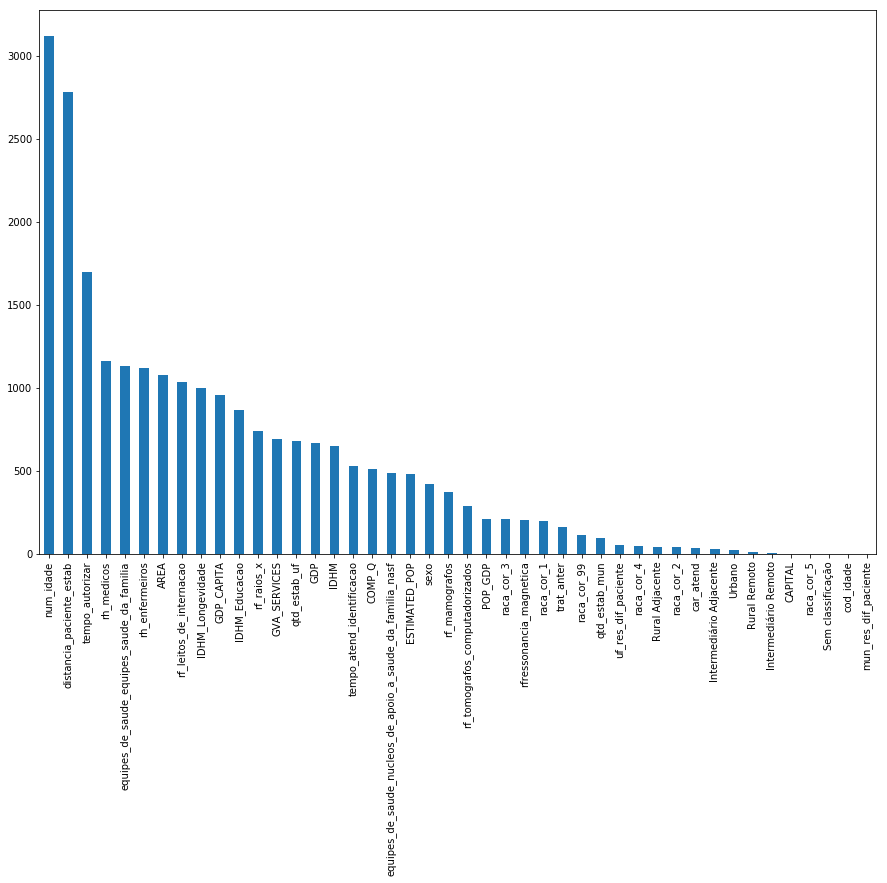

In [218]:
pd.Series(dict(zip(X_train.columns, model.feature_importances_))).sort_values(ascending=False).plot(kind='bar', figsize=(15, 10))